¡Hola!

Mi nombre es Marcos Torres y tengo el gusto de revisar tu código el día de hoy.

Cuando vea algo notable o algún asunto en el notebook, te dejaré un comentario o un hint. Se que encontraras la mejor respuesta para resolver todos los comentarios, de no ser así, no te preocupes en futuras iteraciones dejaré comentarios y pistas más específicos.

Este proceso es muy parecido al que se recibe de un gerente o de un Senior Data Scientist en un trabajo real, por lo que te estarás preparando para la experiencia en la vida real.

Encontrarás comentarios en verde, amarillo o rojo como los siguientes:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Buen trabajo. ¡Lo hiciste muy bien!
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nota. Se puede mejorar.
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Necesitas corregirlo. Este bloque indica que se requiere una correción. El trabajo no se acepta si tiene estos bloques.
</div>

Puedes responder a mis comentarios usando estos bloques:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
df_orders = pd.read_csv ("https://practicum-content.s3.us-west-1.amazonaws.com/datasets/instacart_orders.csv", sep = ';') #archivo delimitado por ;
df_products = pd.read_csv ('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/products.csv', sep = ';') #archivo delimitado por ;
df_aisles = pd.read_csv ('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/aisles.csv', sep = ';') #archivo delimitado por ;
df_departments = pd.read_csv ('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/departments.csv', sep = ';') #archivo delimitado por ;
df_order_products = pd.read_csv ('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/order_products.csv', sep = ';') #archivo delimitado por ;

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bien, usaste una celda independiente para importar las librerías y otra para leer los datos.
</div>

In [3]:
# mostrar información del DataFrame
df_orders.info() 
print()
display(df_orders.head()) #revisamos las primeras 5 filas del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [4]:
# mostrar información del DataFrame
df_products.info()
print()
display(df_products.head()) #revisamos las primeras 5 filas del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB



,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
# mostrar información del DataFrame
df_aisles.info()
print()
display(df_aisles.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB



,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
# mostrar información del DataFrame
df_departments.info()
print()
display(df_departments.head()) #revisamos las primeras 5 filas del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes



,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
# mostrar información del DataFrame
df_order_products.info(show_counts=True)
print()
display(df_order_products.head()) #revisamos las primeras 5 filas del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB



,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Buen uso de los métodos de pandas para explorar los datos.
</div>

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

- orders:
    - en la columna days_since_prior_order observamos valores ausentes, además de que el tipo de datos son float, quizás se podrían cambiar a enteros.

- products:
    - en la columna product_name hay datos ausentes

- aisles:
    - Aparentemente no hay inconsistencias

- departments:
    - Aparentemente no hay inconsistencias

- order_products:
    - en la columna add_to_cart_order hay valores ausentes, y el tipo de datos podría cambiarse de float a int
    - en la columna reordered el tipo de datos es entero pero quizá podría cambiarse a booleano



# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

- Las columnas de ID sí son números enteros
- Hay valores ausentes en: 
    - df_orders['days_since_prior_order']
    - df_products['product_name']
    - df_order_products['add_to_cart_order'] 

De igual manera se podrán identificar con el método isna() combinandolo con el método sum()

Habrá que evaluar si se eliminan los valores ausentes cualitativos con el método dropna() o incluso rellenandolos con el parámetro keep_default_na = False en el caso de product_name.

Para el caso de los valores ausentes cuantitativos se podrían llenar con algun valor, por ejemplo el promedio o la mediana (para los casos de days_since_prior_order y add_to_cart_order) con el método fillna().

- En el caso de los valores duplicados aplicaremos el método duplicated() combinado con sum() para calcular el número de duplicados para cada DataFrame. Analizaremos si es necesario utilizar el método drop_duplicates() para eliminar las filas duplicadas y reset_index() para resetear el índice.



<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Muy bien, el plan esta muy detallado y claro.
</div>

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print('número de pedidos duplicados:', df_orders.duplicated().sum()) #contamos el número de pedidos duplicados
print()
print('valores únicos para order_id:', df_orders['order_id'].nunique()) #revisamos cuántos valores únicos hay para order_id
print()
display(df_orders['order_id'].value_counts()) #pedimos que nos cuente cuantas veces aparece cada valor en la columna 'order_id'


número de pedidos duplicados: 15

valores únicos para order_id: 478952



order_id
2282673    2
467134     2
1286742    2
2232988    2
1021560    2
          ..
1289541    1
2578130    1
1034057    1
597364     1
2071924    1
Name: count, Length: 478952, dtype: int64

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
**Sí, tienen en común el order_id, lo cual significa que cada pedido está duplicado**

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m. 
orders_per_day = df_orders[(df_orders['order_hour_of_day'] == 2)&(df_orders['order_dow']== 3)] #filtramos por condiciones
print()
display(orders_per_day)


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado? **Quizás hubo un error y se duplicaron órdenes, y por lo tanto se pueden eliminar**

In [70]:
# Elimina los pedidos duplicados
df_orders.drop_duplicates(subset = 'order_id', inplace = True)
df_orders.reset_index(drop=True)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478947,3210681,5617,5,1,14,7.0
478948,3270802,112087,2,3,13,6.0
478949,885349,82944,16,2,11,6.0
478950,216274,4391,3,3,8,8.0


In [11]:
# Vuelve a verificar si hay filas duplicadas
print('número de filas duplicadas:', df_orders.duplicated().sum()) #contamos el número de filas duplicadas


número de filas duplicadas: 0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos

print('número de duplicados en order_id:', df_orders['order_id'].duplicated().sum()) #contamos el número de order_id duplicados
print()
print(df_orders['order_id'].value_counts()) #pedimos cuantas veces aparece cada valor en la columna order_id

número de duplicados en order_id: 0

order_id
1515936    1
2365274    1
336622     1
684027     1
1115132    1
          ..
2578130    1
1034057    1
597364     1
2142471    1
2071924    1
Name: count, Length: 478952, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos

**Desde que apliqué el método duplicated() junto con sum() se contaron 15 filas duplicadas, con el método nunique() pude observar que en la columna order_id habían menos valores únicos que el total de entradas. Utilicé el método drop_duplicates() para eliminar los valores dublicados y con el argumento subset definir la columna en la que quería eliminar los duplicados, finalmente aplliqué el argumento inplace = True para modificar el DataFrame.**

**Y así quedamos con un DataFrame sin órdenes duplicadas**

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print('número de filas duplicadas:', df_products.duplicated().sum()) #pedimos que nos cuente el número de filas duplicadas
print()

número de filas duplicadas: 0



In [14]:
# Verifica únicamente si hay IDs duplicadas de productos
print('número de productos duplicados:', df_products['product_id'].duplicated().sum()) #pedimos que nos cuente en número de product_id duplicados


número de productos duplicados: 0


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
print('número de nombres de productos duplicados:', df_products['product_name'].str.upper().duplicated().sum()) #conteo de product_name duplicados en mayúsculas
display(df_products['product_name'].str.upper().value_counts()) #conteo de cada valor duplicado en product_name en mayúsculas

número de nombres de productos duplicados: 1361


product_name
GREEN TEA WITH GINSENG AND HONEY                                        3
CARROT AND CELERY STICKS                                                2
APRICOT ENERGY BAR                                                      2
TOP THE TATER CHIVE & ONION SOUR CREAM                                  2
PROACTIVE HEALTH INDOOR WEIGHT & HAIRBALL CARE WITH CHICKEN CAT FOOD    2
                                                                       ..
ALL NATURAL CHICKEN APPLE SAUSAGE                                       1
QUARTERED ARTICHOKE HEARTS                                              1
BIG EYE IPA                                                             1
UNSTOPABLES LUSH                                                        1
FRESH FOAMING CLEANSER                                                  1
Name: count, Length: 48332, dtype: int64

In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
products_name_duplicates = df_products[~df_products['product_name'].isna()] #filtramos por valores no ausentes en la columna 'product_name'
display(products_name_duplicates['product_name'].str.upper().value_counts()) #conteo de cada valor duplicado en la columna product_name en mayúsculas, de valores no ausentes
print()
print('número de nombres de productos no ausentes duplicados:', products_name_duplicates['product_name'].str.upper().duplicated().sum()) #pedimos que nos cuente los duplicados de nombres de productos no ausentes.


product_name
GREEN TEA WITH GINSENG AND HONEY                                        3
CARROT AND CELERY STICKS                                                2
APRICOT ENERGY BAR                                                      2
TOP THE TATER CHIVE & ONION SOUR CREAM                                  2
PROACTIVE HEALTH INDOOR WEIGHT & HAIRBALL CARE WITH CHICKEN CAT FOOD    2
                                                                       ..
ALL NATURAL CHICKEN APPLE SAUSAGE                                       1
QUARTERED ARTICHOKE HEARTS                                              1
BIG EYE IPA                                                             1
UNSTOPABLES LUSH                                                        1
FRESH FOAMING CLEANSER                                                  1
Name: count, Length: 48332, dtype: int64


número de nombres de productos no ausentes duplicados: 104


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**En este caso surgieron duplicados en la columna product_name, sin embargo no es aconsejable eliminar estos valores duplicados ya que el ID del producto es diferente para cada uno. Es decir, pueden tener el mismo nombre pero ser diferente marca, diferente presentación, diferente precio, etc, por lo cual no sería conveniente eliminar esos productos.**

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Buena observación.
</div>

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print('número de filas duplicadas:', df_departments.duplicated().sum()) #pedimos el conteo de filas duplicadas

número de filas duplicadas: 0


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
print('número de IDs duplicados:', df_departments['department_id'].duplicated().sum()) #pedimos el conteo de duplicados para la columna department_id

número de IDs duplicados: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**Al no haber duplicados no es necesario tratarlos**

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print('número de filas duplicadas:', df_aisles.duplicated().sum()) #pedimos el conteo de filas duplicadas

número de filas duplicadas: 0


In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
print('número de IDs duplicados:', df_aisles['aisle_id'].duplicated().sum()) #pedimos el conteo de duplicados en la columns aisle_id

número de IDs duplicados: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**Al no haber duplicados no es necesario tratarlos**

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Buena comprobación de que no hay duplicados.
</div>

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print('número de filas duplicadas:', df_order_products.duplicated().sum()) #pedimos el conteo de filas duplicadas

número de filas duplicadas: 0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
display('número de order IDs duplicados:', df_order_products['order_id'].value_counts()) #conteo de cada valor duplicado en order_id
print()
display('número de products IDs duplicados:', df_order_products['product_id'].value_counts()) #conteo de cada valor duplicado en product_id

'número de order IDs duplicados:'

order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
3076918      1
2499566      1
556604       1
171279       1
1461911      1
Name: count, Length: 450046, dtype: int64

'número de products IDs duplicados:'

product_id
24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
         ...  
47987        1
26408        1
24435        1
36946        1
40024        1
Name: count, Length: 45573, dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

**Al parecer hay ID de órdenes y productos duplicados, esto puede ser un problema ya que el ID para cada órden debería ser único. Por el momento lo dejaré así, pero quizá sería mejor eliminarlos ya que podría generarnos un problema al analizar los datos**

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

En teoría no hay problema, cada registro representa un producto ordenado, por lo tanto si hay mas de un producto por orden es natural que aparezca la misma orden varias veces.
</div>

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
absent_products = df_products[df_products['product_name'].isna()] #filtramos por valores ausentes en la columna product_name
display(absent_products)
print()
print('número de valores ausentes para product_name:', df_products['product_name'].isna().sum()) #contamos valores ausentes para la columna product_name

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21



número de valores ausentes para product_name: 1258


Describe brevemente cuáles son tus hallazgos.

**Tenemos 1258 valores ausentes NaN y aparentemente todos se relacionan con el pasillo 100, departamento 21**

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print('número de valores ausentes en aisle_id diferente a cien:', absent_products.query('aisle_id != 100')['product_name'].sum()) #pedimos que nos cuente los valores diferentes a 100 en la columna aisle_id, del Dataframe filtrado por valores ausentes en la columna product_name

número de valores ausentes en aisle_id diferente a cien: 0


Describe brevemente cuáles son tus hallazgos.

**Sí, todos los valores ausentes están relacionados con el pasillo 100**

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print('número de valores ausentes en department_id diferente a veintiuno:', absent_products.query('department_id != 21')['product_name'].sum()) #pedimos que nos cuente los valores diferentes a 21 en la columna department_id, del Dataframe filtrado por valores ausentes en la columna product_name

número de valores ausentes en department_id diferente a veintiuno: 0


Describe brevemente cuáles son tus hallazgos.

**Sí, todos los valores ausentes están relacionados con el departamento 21**

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
aisle_one_hundred = df_products.query('aisle_id == 100') #creamos una tabla filtrada con los valores igual a 100 en la columna aisle_id
display(aisle_one_hundred )
department_twentyone = df_products.query('department_id == 21') #creamos una tabla filtrada con los valores igual a 21 en la columna department_id
display(department_twentyone)

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

**Los valores ausentes NaN, el pasillo 100 y departamento 21, están relacionados de manera recíproca** 

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'].fillna('Unknown', inplace= True) #Le pedimos que llene los NaN con unknown
display(df_products.info()) #pedimos la info para revisar si aún hay valores ausentes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


None

Describe brevemente tus hallazgos y lo que hiciste con ellos.

**Rellené los valores ausentes en la columna product_name con Unknown, al revisar la información de la tabla vemos que ya no hay valores ausentes NaN**

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Muy bien, manejaste correctamente los valores ausentes y tus observaciones son correctas.
</div>

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
orders_absent_values = df_orders[df_orders['days_since_prior_order'].isna()] #filtramos por valores ausentes en la columna days_since_prior_order
display(orders_absent_values)
print()
print('número de valores ausentes para days_since_prior_order:', df_orders['days_since_prior_order'].isna().sum()) #contamos valores ausentes para la columna days_since_prior_order
#print(df_orders.query('days_since_prior_order == 0')) #agregué esta línea de código para saber si podía sustituír NaN por 0...pero no 

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN



número de valores ausentes para days_since_prior_order: 28817


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print('número de valores ausentes en days_since_prior_order a partir de un segundo pedido:', orders_absent_values.query('order_number != 1')['days_since_prior_order'].sum())
#pedimos que nos cuente los valores diferentes a 1 en la columna order_number, del Dataframe filtrado por valores ausentes en la columna days_since_prior_order

número de valores ausentes en days_since_prior_order a partir de un segundo pedido: 0.0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**Se observa que sólo hay valores ausentes en days_since_prior_order cuando hay un primer pedido, ésto es lógico puesto que al no haber un pedido anterior (o al ser un primer pedido) no hay número de días desde un pedido anterior, sin embargo estos valores NaN nos imposibilita convertir los datos float a int.**

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Buena observación se corrijió correctamente el dato faltante.
</div>

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
display(df_order_products[df_order_products['add_to_cart_order'].isna()]) #filtramos por valores ausentes en la columna add_to_cart_order
print('número de valores ausentes en add_to_cart_order:', df_order_products['add_to_cart_order'].isna().sum()) #contamos valores ausentes en la columna add_to_cart_order

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


número de valores ausentes en add_to_cart_order: 836


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print('el valor mínimo:', df_order_products['add_to_cart_order'].min())
print('el valor máximo:', df_order_products['add_to_cart_order'].max())

el valor mínimo: 1.0
el valor máximo: 64.0


Describe brevemente cuáles son tus hallazgos.

**Hay 836 valores ausentes NaN en la columna add_to_cart_order, aparentemente no hay ninguna coincidencia con otra columna. El valor mínimo es 1 y el valor máximo es 64, qué pasa con los productos que fueron agregados más de 64 veces?... ***

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
orders_cart_absent = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id'].unique() #asignamos una variable a la columna order_id con valores ausentes en addtocartorder
display(orders_cart_absent)

array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171],
      dtype=int64)

In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
cart_absent_group = df_order_products[df_order_products['order_id'].isin(orders_cart_absent)].groupby('order_id')
cart_absent_group['product_id'].count().min()


65

Describe brevemente cuáles son tus hallazgos.

**Observamos que el número de productos con valores NaN en add_to_cart es de mínimo 65, por lo que podemos deducir que a partir de 65 productos agregados se reemplaza con NaN.**

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'].fillna(999, inplace = True)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int')
print(df_order_products.info(show_counts=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int32
 3   reordered          4545007 non-null  int64
dtypes: int32(1), int64(3)
memory usage: 121.4 MB
None


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**Rellené los valores ausentes NaN en la columna add_to_cart_order con 999 (aunque quizás habría sido bueno rellenar con la media o la mediana) en el dataframe df_order_products, y cambiamos el tipo de datos float a int.**

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

**Se trataron valores duplicados y valores ausentes para poder analizar los datos. 
Sin embargo, el DataFrame df_order_products podría causarnos algunos problemas más adelante en la visualización de datos puesto que hay valores duplicados en las columnas order_id y product_id, además el valor que sustituye los NaN en la columna add_to_cart_order (999) no podría generar una desviación de los datos hacia arriba (o hacia la derecha).**

**Por lo tanto se deberán tomar en cuenta estas observaciones**


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

¡Muy bien! Hiciste un buen trabajo en esta sección.
</div>

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean razonables

In [35]:
print('valor mínimo de hour:', df_orders['order_hour_of_day'].min())
print('valor máximo de hour:', df_orders['order_hour_of_day'].max())
print('valor mínimo de dow:', df_orders['order_dow'].min())
print('valor máximo de dow:', df_orders['order_dow'].max())

valor mínimo de hour: 0
valor máximo de hour: 23
valor mínimo de dow: 0
valor máximo de dow: 6


In [36]:
orders_per_hour = df_orders.groupby('order_hour_of_day')['user_id'].count()
#print(orders_per_hour)
orders_per_day = df_orders.groupby('order_dow')['user_id'].count()
#print(orders_per_day)
#'days_since_prior_order': número de días transcurridos desde que este cliente hizo su pedido anterior.
days_to_next_order = df_orders.groupby('days_since_prior_order')['user_id'].count()
#print(days_to_next_order)

Escribe aquí tus conclusiones

- Los valores de las columnas 'order_hour_of_day' y 'order_dow' son razonables
- Creamos nuevas variables de agrupamientos para poder realizar los gráficos que se piden
- El valor mínimo para days_since_prior_order es 0 y el máximo es de 30 

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Muy biewn con esta validación comprobaste correctamente que las horas se encuentren en formato 24 horas y que los días se encuentren en el rango de los 7 días de la semana, aprovechando que son pocos valores puede resultar útil realizar una validación visual y más rigurosa con el método .unique() el cual al aplicarlo sobre la columna te devuelve una lista con todos los valores únicos de cada columna.
</div>

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

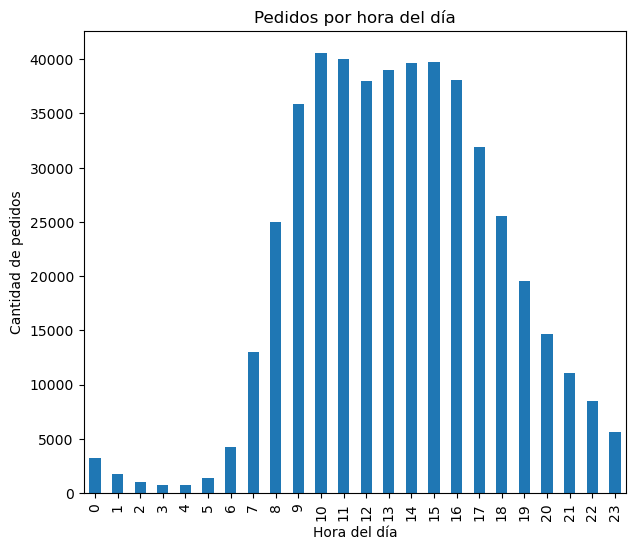

In [37]:
orders_per_hour.plot(
    title = 'Pedidos por hora del día',
    kind = 'bar',
    x = 'order_hour_of_day',
    y = 'user_id',
    xlabel = 'Hora del día',
    ylabel = 'Cantidad de pedidos',
    figsize = [7.0,6.0]
)
plt.show()

Escribe aquí tus conclusiones

**La gente hace más pedidos durante las 8am y las 6pm (entre 20,000 a 40,000 pedidos), la hora en la que más se realizan pedidos es a las 10am. Las horas en las que se realizan menos pedidos es a partir de las 10pm hasta las 6am (menos de 10,000 pedidos)**

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bien, la gráfica es correcta. Se muestra correctamente la distribución de las ordenes a lo largo del día.
</div>

### [A3] ¿Qué día de la semana compran víveres las personas?

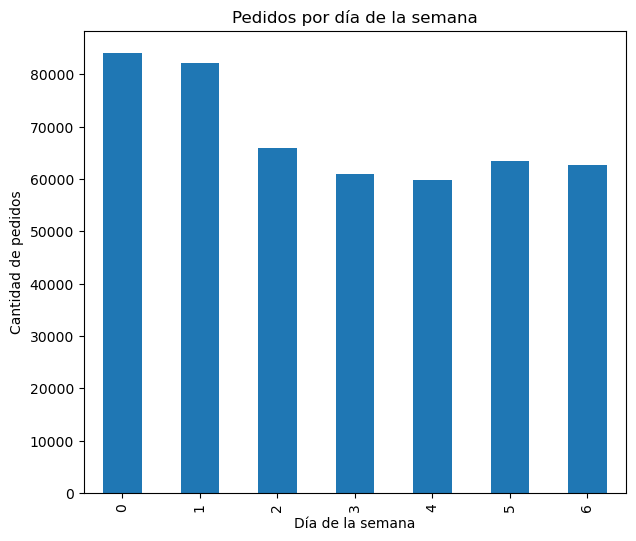

In [38]:
orders_per_day.plot(
     title = 'Pedidos por día de la semana',
    kind = 'bar',
    x = 'order_dow',
    y = 'user_id',
    xlabel = 'Día de la semana',
    ylabel = 'Cantidad de pedidos',
    figsize = [7.0,6.0]
)
plt.show()

Escribe aquí tus conclusiones

**Los días que más se realizan pedidos son los Domingos y los Lunes (arriba de 70,000 pedidos), aparentemente los días Jueves son los días en que menos se realizan pedidos. Sin embargo, no podría asegurar que haya una diferencia estadística significativa**

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

La gráfica es correcta contiene título y los ejes tienen nombre.
</div>

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

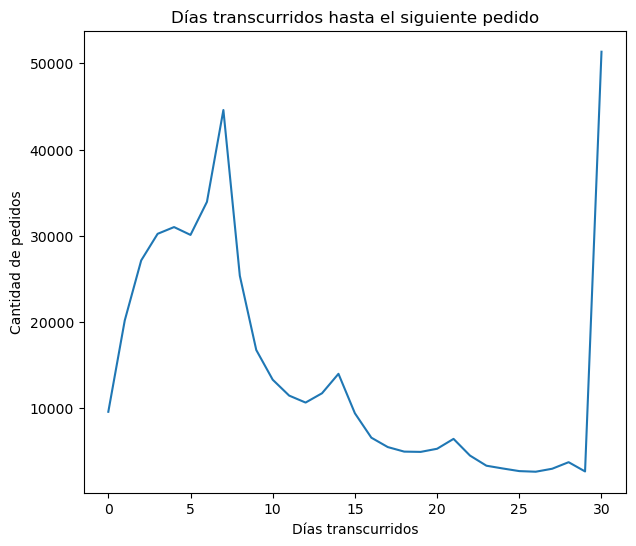

In [39]:
days_to_next_order.plot(
    title = 'Días transcurridos hasta el siguiente pedido',
    #kind = 'bar',
    x = 'days_since_prior_order',
    y = 'user_id',
    xlabel = 'Días transcurridos',
    ylabel = 'Cantidad de pedidos',
    figsize = [7.0,6.0]
)
plt.show()

Escribe aquí tus conclusiones

**La gente realiza nuevos pedidos esperando entre 0 y 30 días, habiendo un pico al día 7 y otro al día 30 (arriba de 40,000).** 

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bien, solo falta hacer un comentario de la presencia del pico en el día 30, este no es natural se debe a que todas las ordenes que toman más de 30 días se agrupan en el número 30.
</div>

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [40]:
Wednesday = df_orders.query('order_dow == 3').groupby('order_hour_of_day')['user_id'].count() #filtramos por el día 3 que es miércoles, agrupamos por hora del día y pedimos que nos cuente la cantidad de personas que realizan pedidos
#print(Wednesday)
Saturday = df_orders.query('order_dow == 6').groupby('order_hour_of_day')['user_id'].count() #filtramos por el día 6 que es sábado, agrupamos por hora del día y pedimos que nos cuente la cantidad de personas que realizan pedidos
#print(Saturday)

In [41]:
df_concat_days = pd.concat([Wednesday, Saturday], axis='columns')
df_concat_days.columns = range(df_concat_days.shape[1])
df_concat_days.rename(columns = {0:'Wednesday', 1:'Saturday'}, inplace = True)
print(df_concat_days) 

                   Wednesday  Saturday
order_hour_of_day                     
0                        373       464
1                        215       254
2                        106       177
3                        101       125
4                        108       118
5                        170       161
6                        643       451
7                       1732      1619
8                       3125      3246
9                       4490      4311
10                      5026      4919
11                      5004      5116
12                      4688      5132
13                      4674      5323
14                      4774      5375
15                      5163      5188
16                      4976      5029
17                      4175      4295
18                      3463      3338
19                      2652      2610
20                      1917      1847
21                      1450      1473
22                      1154      1185
23                       

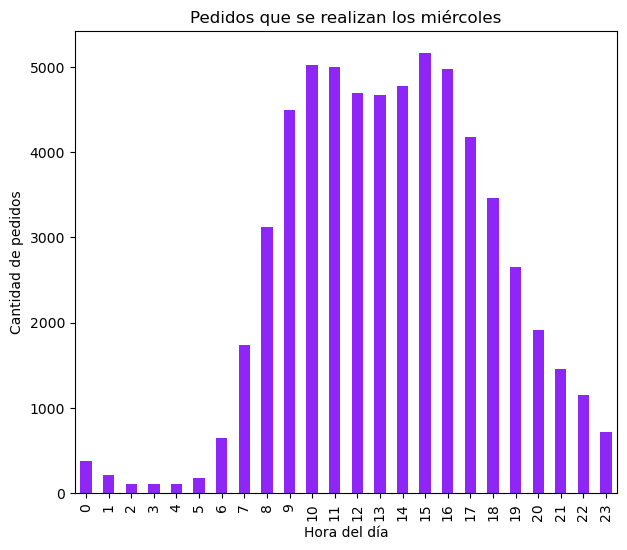

In [42]:
Wednesday.plot(
    title = 'Pedidos que se realizan los miércoles',
    kind = 'bar',
    x = 'order_hour_of_day',
    y = 'user_id',
    xlabel = 'Hora del día',
    ylabel = 'Cantidad de pedidos',
    color = '#8E27F5',
    figsize = [7.0,6.0]
)
plt.show()

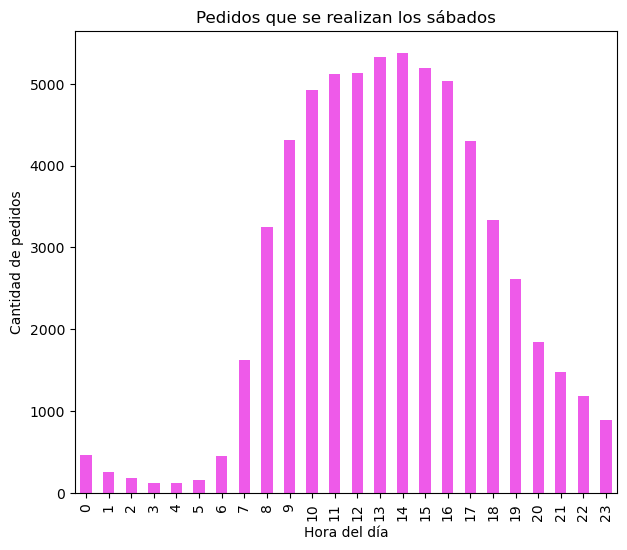

In [43]:
Saturday.plot(
    title = 'Pedidos que se realizan los sábados',
    kind = 'bar',
    x = 'order_hour_of_day',
    y = 'user_id',
    xlabel = 'Hora del día',
    ylabel = 'Cantidad de pedidos',
    color = '#EE5AE9',
    figsize = [7.0,6.0]
)
plt.show()

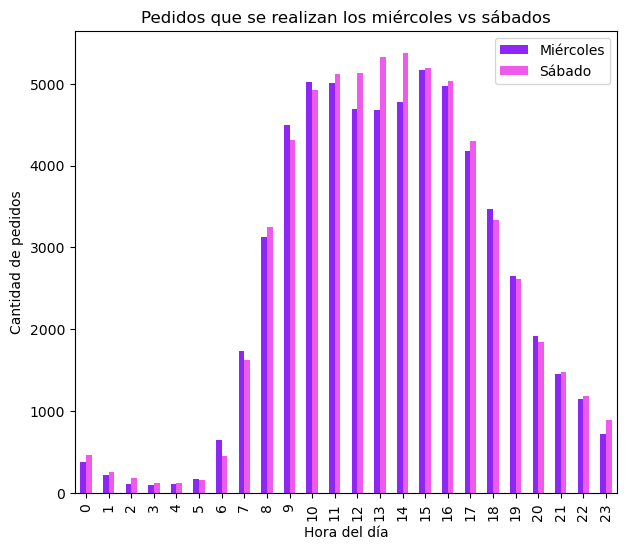

In [44]:
df_concat_days.plot(
    title = 'Pedidos que se realizan los miércoles vs sábados',
    kind = 'bar',
    xlabel = 'Hora del día',
    ylabel = 'Cantidad de pedidos',
    color = ['#8E27F5','#EE5AE9'],
    figsize = [7.0,6.0],
    )
plt.legend(['Miércoles', 'Sábado'])
plt.show()

Escribe aquí tus conclusiones

**Aparentemente no hay una gran diferencia entre los pedidos que se realizan los miércoles vs sábados, sin embargo, podemos observar un pequeño cambio en el número de pedidos entre las 11am y 5pm (más marcadamente entre las 12pm y las 2pm), en donde los días sábados se realizan más pedidos.**

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Muy bien, comparaste correctamente la distribución de los dos días y usaste correctamente una gráfica con dos barras para compararlas hora por hora.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Como consejo sería bueno usar dos colores con contraste para que no se note más la diferencia entre un día y otro.
</div>

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [45]:
#Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...)
display(df_orders.groupby('order_number')['user_id'].count())

order_number
1      28817
2      28633
3      28685
4      28703
5      25661
       ...  
96       220
97       221
98       191
99       169
100      194
Name: user_id, Length: 100, dtype: int64

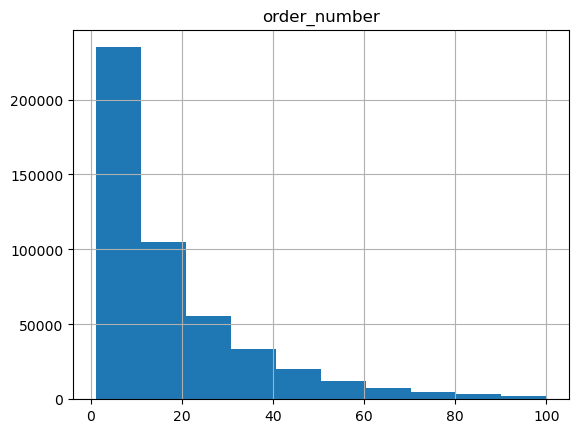

In [46]:
df_orders.hist(column = 'order_number')
plt.show()

Escribe aquí tus conclusiones

**Este histograma nos grafica la frecuencia en el eje Y y las categorías en el eje X, podemos observar que los datos se concentran a la izquierda, es decir que a menor número de pedido mayor frecuencia (o más gente que realiza 1-10 pedidos) y viceversa: a mayor número de pedido, menor frecuencia (o menos gente que realiza pedidos 90-100)**

**Las razones pueden ser diversas, puede ser por que es un mercado nuevo, o quizás los clientes no están satisfechos por eso la gran mayoría solo realiza un pedido y ya no vuelven a hacer pedidos, o quizás hay un descuento al realizar un primer pedido y después ya no les conviene, etc**

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Buenas observaciones y el histograma es correcto.
</div>

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [47]:
#hacemos un conteo de los valores únicos en la columna 'product_id'
product_count = df_order_products['product_id'].value_counts()
print(product_count)

product_id
24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
         ...  
47987        1
26408        1
24435        1
36946        1
40024        1
Name: count, Length: 45573, dtype: int64


In [48]:
#pedimos los 20 productos más comprados con el método head
popular_products_count = product_count.head(20)
print(popular_products_count)

product_id
24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
47766    24689
47626    21495
16797    20018
26209    19690
27845    19600
27966    19197
22935    15898
24964    15292
45007    14584
39275    13879
49683    13675
28204    12544
5876     12232
8277     11993
40706    11781
Name: count, dtype: int64


In [49]:
#pedimos sólo el índice de nuestra tabla anterior ya que es el id del producto, y lo onvertimos y guardamos en una lista
popular_products_id = popular_products_count.index.tolist()
print(popular_products_id)

[24852, 13176, 21137, 21903, 47209, 47766, 47626, 16797, 26209, 27845, 27966, 22935, 24964, 45007, 39275, 49683, 28204, 5876, 8277, 40706]


In [50]:
#filtramos nuestro dataframe products pidiendo que busque los id de productos en la lista guardada
popular_products_name = df_products.query('product_id in @popular_products_id')
print(popular_products_name)

       product_id              product_name  aisle_id  department_id
5875         5876             Organic Lemon        24              4
8276         8277  Apple Honeycrisp Organic        24              4
13175       13176    Bag of Organic Bananas        24              4
16796       16797              Strawberries        24              4
21136       21137      Organic Strawberries        24              4
21902       21903      Organic Baby Spinach       123              4
22934       22935      Organic Yellow Onion        83              4
24851       24852                    Banana        24              4
24963       24964            Organic Garlic        83              4
26208       26209                     Limes        24              4
27844       27845        Organic Whole Milk        84             16
27965       27966       Organic Raspberries       123              4
28203       28204        Organic Fuji Apple        24              4
39274       39275       Organic Bl

In [51]:
#imprimimos sólo las columnas que nos piden: id y nombre de los 20 productos más pedidos
print(popular_products_name[['product_id', 'product_name']])

       product_id              product_name
5875         5876             Organic Lemon
8276         8277  Apple Honeycrisp Organic
13175       13176    Bag of Organic Bananas
16796       16797              Strawberries
21136       21137      Organic Strawberries
21902       21903      Organic Baby Spinach
22934       22935      Organic Yellow Onion
24851       24852                    Banana
24963       24964            Organic Garlic
26208       26209                     Limes
27844       27845        Organic Whole Milk
27965       27966       Organic Raspberries
28203       28204        Organic Fuji Apple
39274       39275       Organic Blueberries
40705       40706    Organic Grape Tomatoes
45006       45007          Organic Zucchini
47208       47209      Organic Hass Avocado
47625       47626               Large Lemon
47765       47766           Organic Avocado
49682       49683            Cucumber Kirby


Escribe aquí tus conclusiones

- El producto no.1 es la banana con 66,050 pedidos
- En segundo lugar la bolsa de bananas orgánicas con 53,297 pedidos
- Y en tercer lugar las fresas orgánicas con 37,039 pedidos

**La mayoría de estos productos son frutas y verduras, 15 de los 20 son productos orgánicos, y en la posición número 10 está la leche. Todos son productos del departamento 4, excepto la leche que es del departamento 16.**

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Muy bien, la lista es correcta.
</div>

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [52]:
products_per_order = df_order_products['order_id'].value_counts().mean()
print(f'En promedio las personas piden: {products_per_order} artículos')

En promedio las personas piden: 10.098983215049127 artículos


In [53]:
products_dist = df_order_products['order_id'].value_counts()
print(products_dist)

order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
3076918      1
2499566      1
556604       1
171279       1
1461911      1
Name: count, Length: 450046, dtype: int64


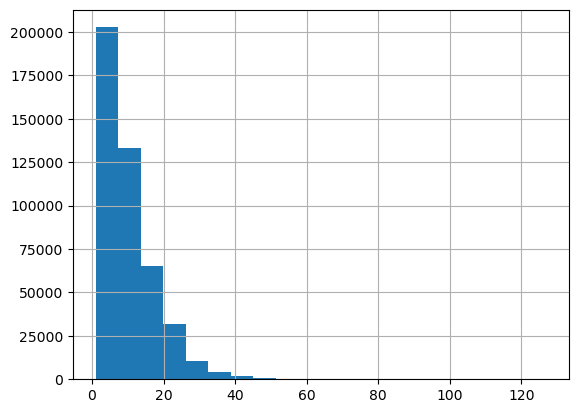

In [54]:
products_dist.hist(bins = 20)
plt.show()

Escribe aquí tus conclusiones

**La mayoría de las personas piden entre 1 a 20 artículos, el promedio es de 10 artículos por pedido, algunas otras personas piden más artículos llegando a comprar hasta 127 artículos por pedido.**

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bien, usaste correctamente el value counts().
</div>

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [55]:
#filtramos por productos que se hayan reordenado (es decir que en 'reorder' tengan 1)
product_reorder = df_order_products.query('reordered == 1')
print(product_reorder)

         order_id  product_id  add_to_cart_order  reordered
1          567889        1560                  1          1
2         2261212       26683                  1          1
3          491251        8670                 35          1
4         2571142        1940                  5          1
5         2456893       21616                  4          1
...           ...         ...                ...        ...
4544999   1622300       24852                  1          1
4545000   1125324       40600                  6          1
4545002    577211       15290                 12          1
4545004    692640       47766                  4          1
4545005    319435         691                  8          1

[2683838 rows x 4 columns]


In [56]:
#agrupamos por 'product_id' la tabla anterior y hacemos un conteo
product_id_reorder_all = product_reorder.groupby('product_id')['reordered'].count()
#print(product_id_reorder_all)
#ordenamos de mayor conteo a menor
product_id_reorder = product_id_reorder_all.sort_values(ascending = False)
#pedimos que nos imprima los 20 productos más re-pedidos
product_id_reorder = product_id_reorder.head(20)
print(product_id_reorder)

product_id
24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
47766    18743
27845    16251
47626    15044
27966    14748
16797    13945
26209    13327
22935    11145
24964    10411
45007    10076
49683     9538
28204     8989
8277      8836
39275     8799
5876      8412
49235     8389
Name: reordered, dtype: int64


In [57]:
#Pedimos que de la lista anterior nos regrese el índice (porque el índice es el product_id) y lo convertimos en una lista
popular_products_id_reorder = product_id_reorder.index.tolist()
print(popular_products_id_reorder)

[24852, 13176, 21137, 21903, 47209, 47766, 27845, 47626, 27966, 16797, 26209, 22935, 24964, 45007, 49683, 28204, 8277, 39275, 5876, 49235]


In [58]:
#pedimos un query en el dataframe products (que es donde tenemos guardado los nombres de los productos) pidiendole los id de productos que guardamos en nuestra lista
popular_products_reorder = df_products.query('product_id in @popular_products_id_reorder')
print(popular_products_reorder)


       product_id              product_name  aisle_id  department_id
5875         5876             Organic Lemon        24              4
8276         8277  Apple Honeycrisp Organic        24              4
13175       13176    Bag of Organic Bananas        24              4
16796       16797              Strawberries        24              4
21136       21137      Organic Strawberries        24              4
21902       21903      Organic Baby Spinach       123              4
22934       22935      Organic Yellow Onion        83              4
24851       24852                    Banana        24              4
24963       24964            Organic Garlic        83              4
26208       26209                     Limes        24              4
27844       27845        Organic Whole Milk        84             16
27965       27966       Organic Raspberries       123              4
28203       28204        Organic Fuji Apple        24              4
39274       39275       Organic Bl

In [59]:
#imprimimos sólo las columnas que nos piden: id y nombre de los 20 productos más re-pedidos
print(popular_products_reorder[['product_id', 'product_name']])

       product_id              product_name
5875         5876             Organic Lemon
8276         8277  Apple Honeycrisp Organic
13175       13176    Bag of Organic Bananas
16796       16797              Strawberries
21136       21137      Organic Strawberries
21902       21903      Organic Baby Spinach
22934       22935      Organic Yellow Onion
24851       24852                    Banana
24963       24964            Organic Garlic
26208       26209                     Limes
27844       27845        Organic Whole Milk
27965       27966       Organic Raspberries
28203       28204        Organic Fuji Apple
39274       39275       Organic Blueberries
45006       45007          Organic Zucchini
47208       47209      Organic Hass Avocado
47625       47626               Large Lemon
47765       47766           Organic Avocado
49234       49235       Organic Half & Half
49682       49683            Cucumber Kirby


Escribe aquí tus conclusiones

- El producto más popular reordenado fue la banana con 55,763 reórdenes
- En segundo lugar tenemos a la bolsa de bananas orgánicas con 44,450 reórdenes
- En tercer lugar tenemos al producto fresas orgánicas con 28,639 reórdenes

**Dentro de los 20 productos más populares que se reordenan en su mayoría son productos orgánicos (15 de 20), la mayoría pertenecen al departamento 4, excepto la leche orgánica (el producto organic half & half también es leche orgánica).**

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Filtraste los productos reordenados correctamente y obtuviste bien el conteo de los más populares.
</div>

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [60]:
#agrupar por producto y aplicar promedio de la columna de reordered, asignamos una variable
promedio_reordered = df_order_products.groupby('product_id')['reordered'].mean()
print(promedio_reordered)

product_id
1        0.564286
2        0.000000
3        0.738095
4        0.510204
7        0.500000
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Name: reordered, Length: 45573, dtype: float64


<Axes: >

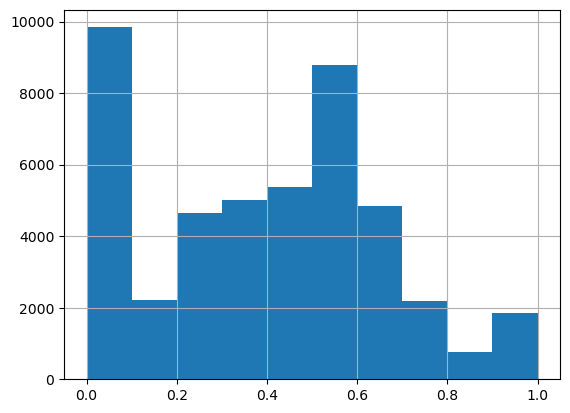

In [61]:
#graficamos un histograma para visualizar a manera resumida los datos 
promedio_reordered.hist(bins = 10,
                       )

Escribe aquí tus conclusiones

- Algunos productos (arriba de 8,000) nunca se reordenan
- Algunos otros (arriba de 8,000) se piden entre 0.5 y 0.6 veces, es decir, de cada 100 pedidos estos productos se piden entre 50 y 60% de los pedidos
- Si tomamos en cuenta solo los datos de los pedidos reordenados, es probable que obtengamos una distribución normal.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

¡Muy bien! Usaste correctamente el group by con mean para obtener el conteo del promedio de veces que se vuelve a pedir el producto.
</div>

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [62]:
# unir dataframes para tener la órden por cliente y saber el valor de reordered
merge_tables  = df_orders.merge(df_order_products, on = 'order_id', how = 'left')
print(merge_tables)

         order_id  user_id  order_number  order_dow  order_hour_of_day  \
0         1515936   183418            11          6                 13   
1         1515936   183418            11          6                 13   
2         1515936   183418            11          6                 13   
3         1515936   183418            11          6                 13   
4         1515936   183418            11          6                 13   
...           ...      ...           ...        ...                ...   
4573908   2071924     1730            18          1                 14   
4573909   2071924     1730            18          1                 14   
4573910   2071924     1730            18          1                 14   
4573911   2071924     1730            18          1                 14   
4573912   2071924     1730            18          1                 14   

         days_since_prior_order  product_id  add_to_cart_order  reordered  
0                          30.0    

In [63]:
#agrupar los datos por cliente y sacar promedio de los reordered
mean_reordered_per_client = merge_tables.groupby('user_id')['reordered'].mean()
print(mean_reordered_per_client)

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 157437, dtype: float64


<Axes: >

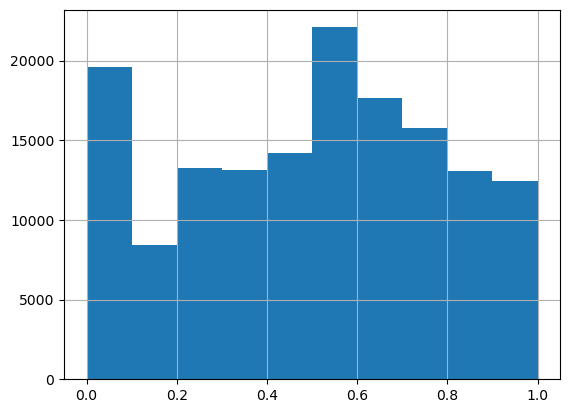

In [64]:
#graficamos un histograma para visualizar a manera resumida los datos 
mean_reordered_per_client.hist()

Escribe aquí tus conclusiones

- Podemos observar que muchos clientes (abajo de 20,000 clientes) no reordenan un producto
- Muchos otros clientes (arriba de 20,000) reordenan de 0.5 a 0.6 veces un producto, es decir que de cada pedido es probable (50-60% de probabilidad) que metan nuevamente en su carrito de compras un producto que ya habían pedido anteriormente

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Usaste correctamente el merge para calcular este inciso.
</div>

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [65]:
#filtramos el df order_products, donde se haya agregado el primer artículo en el carrito. Guardamos el filtrado en una variable
first_to_added = df_order_products.query('add_to_cart_order ==1')
print(first_to_added)

         order_id  product_id  add_to_cart_order  reordered
1          567889        1560                  1          1
2         2261212       26683                  1          1
14        1961225       37553                  1          1
16         639939       10017                  1          1
23         750040        8518                  1          0
...           ...         ...                ...        ...
4544978   1759009       46175                  1          0
4544989    115427       20842                  1          1
4544990   2049780       28576                  1          1
4544997   2300092       10017                  1          0
4544999   1622300       24852                  1          1

[450046 rows x 4 columns]


In [66]:
#pedimos que no agrupe la tabla anterior por product_id y que nos cuente las veces que se ha pedido como primer producto agregado al carrito. Guardamos el resultado en una nueva variable
first_added_count = first_to_added.groupby('product_id')['reordered'].count()
print(first_added_count)

product_id
1        47
2         2
3         5
4         1
8         4
         ..
49687     1
49688     1
49690     2
49691     3
49693     3
Name: reordered, Length: 26760, dtype: int64


In [67]:
#pedimos que nos ordene la lista por el mayor conteo
first_added = first_added_count.sort_values(ascending = False)
#print(first_added) 
#pedimos que nos regrese los primeros 20 productos
first_added = first_added.head(20)
print(first_added)
#pedimos que nos regrese el índice de este series (que son los id de productos) en una lista
first_added = first_added.index.tolist()
#print(first_added)

product_id
24852    15562
13176    11026
27845     4363
21137     3946
47209     3390
21903     3336
47766     3044
19660     2336
16797     2308
27966     2024
44632     1914
49235     1797
47626     1737
196       1733
38689     1397
26209     1370
12341     1340
5785      1310
27086     1309
43352     1246
Name: reordered, dtype: int64


In [68]:
#hacemos una consulta en el dataframe df_products, para saber los nombres de los productos que más se añaden como primer producto al carrito
products_first_added = df_products.query('product_id in @first_added')
#print(products_first_added )
#pedimos que se imprima sólo las columnas de product_id y la de product_name
print(products_first_added[['product_id', 'product_name' ]])

       product_id                 product_name
195           196                         Soda
5784         5785  Organic Reduced Fat 2% Milk
12340       12341                Hass Avocados
13175       13176       Bag of Organic Bananas
16796       16797                 Strawberries
19659       19660                 Spring Water
21136       21137         Organic Strawberries
21902       21903         Organic Baby Spinach
24851       24852                       Banana
26208       26209                        Limes
27085       27086                  Half & Half
27844       27845           Organic Whole Milk
27965       27966          Organic Raspberries
38688       38689     Organic Reduced Fat Milk
43351       43352                  Raspberries
44631       44632   Sparkling Water Grapefruit
47208       47209         Organic Hass Avocado
47625       47626                  Large Lemon
47765       47766              Organic Avocado
49234       49235          Organic Half & Half


Escribe aquí tus conclusiones

- Nuevamente vemos a la banana en primer lugar como producto que más se añade al carrito como primer producto (con 15,562 veces)
- Y la bolsa de bananas orgánicas en segundo lugar (11,026 veces)
- En tercer lugar el jugo de toronja aparece esta vez con 4,363 veces que se añadió como primer producto añadido al carrito

**Esta vez observamos que de los 20 productos populares agregados primero al carrito 12 pertenecen al departamento 4, 4 al departamento 16 (todas leches), y 3 son bebidas que pertenecen al departamento 7**

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

El filtro para obtener los productos que se colocan primero en el carrito es correcto.
</div>

### Conclusion general del proyecto:

- Con los datos obtenidos pudimos observar que el producto más popular en instacart son las bananas (a pesar de que su logo es una zanahoria), muchos de los productos más pedidos son frutas y verduras orgánicas, así como también la leche. 

- Con algunas gráficas pudimos observar que hay clientes frecuentes, pero también muchos otros clientes que sólo han comprado por única vez. 

- La mayoría de los pedidos van de 1-20 productos añadidos.

- La hora del día en la que más se realizan pedidos es durante las horas en las que hay luz

Este proyecto me pareció divertido, tardé mucho más tiempo en resolverlo a comparación de los dos proyectos anteriores y aún me quedaron dudas (no sé si los respondí bien), 
me gustó mucho.

Espero la retroalimentación. 

Gracias 

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

¡Hola!
    
Me da gusto que te haya parecido divertido este proyecto. LAs conclusiones me parecen buenas, se podrían completar incluyendo un par de descubrimientos de la sección de ejercicios.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

¡Hola!
    
Te quiero felicitar por tu proyecto, está bastante completo y se nota la dedicación para realizarlo. Me gusto mucho el buen manejo de los group by y del método query() para realizar correctamente los conteos en los ejercicios. Realicé algunos comentarios en bloques de color amarillo que son opcionales pero no necesitas corregir nada para que lo pueda aprobar, felicidades y mucho éxito en los siguientes sprints.
    
Saudos, Marcos.
</div>